# Jenis Game dengan Pendapatan Tertinggi

## Pendahuluan
Proyek ini bertujuan untuk menemukan jenis game yang paling potensial untuk merencanakan kampanye iklan ditahun depan, serta untuk menguji beberapa hipotesis.

### Tujuan :
Menganalisa dan menentukan game dengan penjualan tertinggi dan berpotensial.

Menguji hipotesis :

— Rata-rata rating pengguna platform Xbox One dan PC adalah sama.

— Rata-rata rating pengguna genre Action dan Sports berbeda.

### Tahapan :
1. Memuat Data
2. Pra-pemrosesan Data
3. Analisa Data
4. Pemrofilan Pengguna per Wilayah
5. Menguji Hipotesis

## Memuat Data

Memuat semua *library* yang dibutuhkan.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import math as mt
import math
import numpy as np

Memuat semua data dan membaca informasi umumnya.

In [2]:
try:
    df = pd.read_csv('games.csv')
    
except:
    df = pd.read_csv('/datasets/games.csv')

In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


(16715, 11)

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Deskripsi Data

- Name (nama)
- Platform
- Year_of_Release (tahun rilis)
- Genre
- NA_sales (penjualan di Amerika Utara dalam satuan juta USD)
- EU_sales (penjualan di Eropa dalam satuan juta USD)
- JP_sales (penjualan di Jepang dalam satuan juta USD)
- Other_sales (penjualan di negara lainnya dalam satuan juta USD)
- Critic_Score (skor ulasan dari kritikus, maksimal 100)
- User_Score (skor ulasan dari pengguna, maksimal 10)
- Rating (ESRB)

In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Kesimpulan

Dari eksplorasi awal, terlihat ada nilai yang hilang dibeberapa kolom, serta kesalahan pada penulisan nama kolom, dimana nama kolom menggunakan huruf besar. Selain itu, terdapat beberapa kolom dalam tipe data yang tidak tepat. Masalah ini akan diperbaiki pada tahap selanjutnya, pra-pemrosesan data.   

## Pra-pemrosesan Data

### Penulisan Kolom

Menampilkan judul kolom :

In [6]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Mengubah nama kolom menjadi huruf kecil semua.

In [7]:
df.columns = df.columns.str.lower()

Memeriksa nama kolom setelah diperbaiki.

In [8]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Menangani Nilai yang Hilang & Duplikat

Menampilkan nilai yang hilang.

In [9]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Karena jumlah nilai yang hilang dikolom `name`, dan kolom `genre` sangat sedikit, nilai yang hilang pada kolom ini akan dihapus.

Memeriksa terlebih dahulu apakah nilai yang hilang dikolom `name` dan `genre` berasal dari baris yang sama mengingat jumlahnya yang simetris.

In [10]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Menghapus baris dengan nilai yang hilang dikolom `name`, sekaligus kolom `genre` karena nilai Nan berada pada baris yang sama.

In [11]:
df = df.dropna(subset=['name']).reset_index(drop=True)

Mengingat tahun rilis game berkaitan dengan platform yang meluncurkan game tersebut, nilai yang hilang dikolom `year_of_release` akan diisi dengan mediannya berdasarkan platform.

Membuat table data tanpa nilai yang hilang terlebih dahulu, untuk menghitung medianya.

In [12]:
df_cleaned = df.dropna().reset_index(drop=True)
df_cleaned.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [13]:
def fillna_year(df):
    
    median_by_platform = df_cleaned.groupby('platform')['year_of_release'].median()

    for (platform), median in median_by_platform.items():
        df.loc[(df['platform'] == platform) & (df['year_of_release'].isnull()), 'year_of_release'] = median

    return df

df = fillna_year(df)
df['year_of_release'].isna().sum()

21

In [14]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
1505,Adventure,2600,NaN,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN
1584,Combat,2600,NaN,Action,1.17,0.07,0.00,0.01,NaN,NaN,NaN
2009,Donkey Kong Land III,GB,NaN,Platform,0.68,0.31,0.00,0.04,NaN,NaN,NaN
2105,Air-Sea Battle,2600,NaN,Shooter,0.91,0.06,0.00,0.01,NaN,NaN,NaN
3882,Fishing Derby,2600,NaN,Sports,0.48,0.03,0.00,0.01,NaN,NaN,NaN
4131,Karate,2600,NaN,Fighting,0.44,0.03,0.00,0.00,NaN,NaN,NaN
4219,Circus Atari,2600,NaN,Action,0.43,0.03,0.00,0.00,NaN,NaN,NaN
4336,Maze Craze: A Game of Cops 'n Robbers,2600,NaN,Action,0.42,0.02,0.00,0.00,NaN,NaN,NaN
4436,Super Breakout,2600,NaN,Puzzle,0.41,0.03,0.00,0.00,NaN,NaN,NaN


Setelah melakukan metode fillna di kolom `year_of_release`, masih terdapat 21 baris dengan nilai yang hilang, yang disebabkan oleh hanya terdapat nilai Nan di beberapa platform tertentu sehingga tidak dapat menghitung mediannya.

Oleh sebab itu, sisa baris dengan nilai yang hilang pada kolom ini akan dihapus.

In [15]:
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)

Memeriksa jumlah nilai yang hilang dikolom `critic_score` yang dikelompokan berdasarkan kolom `platform`, untuk melihat apakah terdapat pola dari nilai Nan berdasarkan platformnya.

In [16]:
df[df['critic_score'].isna()]['platform'].value_counts().reset_index()

,index,platform
0,DS,1434
1,PS,997
2,PS2,863
3,PSP,747
4,Wii,735
5,PS3,511
6,GBA,384
7,3DS,352
8,X360,346
9,N64,316


Memeriksa jumlah nilai yang hilang dikolom `critic_score` yang dikelompokan berdasarkan kolom `genre`, untuk melihat apakah terdapat pola dari nilai Nan berdasarkan genrenya.

In [17]:
df[df['critic_score'].isna()]['genre'].value_counts().reset_index()

,index,genre
0,Action,1472
1,Misc,1227
2,Sports,1151
3,Adventure,979
4,Role-Playing,760
5,Simulation,521
6,Racing,505
7,Fighting,439
8,Platform,390
9,Strategy,381


Dari pemeriksaan nilai yang hilang pada kolom `critic_score` diatas, tidak ditemukan adanya pola tertentu baik yang dikelompokan berdasarkan platform maupun genrenya. Kemungkinan nilai yang hilang pada kolom ini bersifat acak. Oleh sebab itu, untuk menanganinya, nilai yang hilang akan diisi dengan median atau meannya.

Mengingat genre game dapat mempengaruhi score yang diberikan, mean dan median kolom `critic_score` akan dihitung berdasarkan genrenya, dan juga dihitung berdasarkan table data tanpa nilai yang hilang. 

Menghitung mean dan median yang dikelompokan berdasakan genre, menggunakan table data yang bersih. 

In [18]:
df_grouped = df_cleaned.groupby(['genre']).agg(
    {'critic_score': ['mean', 'median']}) 

df_grouped

critic_score       
                     mean median
genre                           
Action          66.673035   68.0
Adventure       64.929766   66.0
Fighting        69.193548   72.0
Misc            66.640873   69.0
Platform        68.173824   70.0
Puzzle          67.152778   70.0
Racing          67.994390   69.0
Role-Playing    72.651099   74.0
Shooter         70.268770   73.0
Simulation      68.535088   70.0
Sports          72.035714   75.0
Strategy        72.333333   74.0

Terdapat perbedaan nilai mean dan median pada kolom ini. Oleh karena itu, nilai median akan digunakan untuk menangani nilai yang hilang, untuk menghindari pengaruh adanya outlier/anomali pada nilai mean.

Mengisi nilai Nan dikolom `critic_score` dengan median.

In [19]:
def fillna_critic_score(df):
    
    median_by_genre = df_cleaned.groupby('genre')['critic_score'].median()

    for (genre), median in median_by_genre.items():
        df.loc[(df['genre'] == genre) & (df['critic_score'].isnull()), 'critic_score'] = median

    return df

df = fillna_critic_score(df)
df['critic_score'].isna().sum()

0

Sebelum melanjutkan menangani nilai yang hilang pada dua kolom lainnya, kolom `user_score` dengan nilai `tbd` akan diperiksa terlebih dahulu, untuk mempermudah proses selanjutnya.

Memeriksa jumlah baris dengan nilai `tbd` dikolom `user_score`.

In [20]:
df['user_score'][df['user_score'] == 'tbd'].count()

2424

Karena jumlahnya cukup banyak, perlu diperiksa apakah terdapat pola dari nilai ini.

Memeriksa jumlah baris nilai `tbd` yang dikelompokan berdasarkan kolom `genre`, untuk melihat apakah genre game mempengaruhi score tbd ini.

In [21]:
df[df['user_score'] == 'tbd']['genre'].value_counts().reset_index()

,index,genre
0,Misc,449
1,Sports,413
2,Action,376
3,Simulation,237
4,Racing,233
5,Puzzle,211
6,Adventure,159
7,Platform,139
8,Shooter,99
9,Strategy,39


Tidak terdapat pola tertentu, pada pengelompokan ini.

Selanjutnya memeriksa jumlah baris nilai `tbd` yang dikelompokan berdasarkan kolom `platform`, untuk melihat apakah platform game mempengaruhi score tbd ini.

In [22]:
df[df['user_score'] == 'tbd']['platform'].value_counts().reset_index()

,index,platform
0,DS,756
1,Wii,440
2,GBA,262
3,PS2,240
4,XB,150
5,PSP,123
6,GC,103
7,PS3,87
8,X360,84
9,3DS,56


Juga tidak terdapat pola tertentu pada pengelompokan ini. Kemungkinan nilai `tbd` tersebar secara acak, sebab tidak ada genre atau platform tertentu yang mempengaruhinya. Untuk mendapatkan data yang sesuai analisa, nilai `tbd` dikolom `user_score`, akan diganti dengan nilai mean atau mediannya.

Membuat table data baru tanpa nilai `tbd` dan nilai Nan.

In [23]:
df_filtered = df[df['user_score'] != 'tbd'].dropna().reset_index(drop=True)

Agar dapat menghitung nilai mean dan median pada kolom `user_score`, tipe data kolom ini perlu diperbaiki terlebih dahulu, menjadi desimal.

Mengubah tipe data kolom `user_score` menjadi tipe angka desimal.

In [24]:
df_filtered['user_score'] = df_filtered['user_score'].astype(float)
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7504 entries, 0 to 7503
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             7504 non-null   object 
 1   platform         7504 non-null   object 
 2   year_of_release  7504 non-null   float64
 3   genre            7504 non-null   object 
 4   na_sales         7504 non-null   float64
 5   eu_sales         7504 non-null   float64
 6   jp_sales         7504 non-null   float64
 7   other_sales      7504 non-null   float64
 8   critic_score     7504 non-null   float64
 9   user_score       7504 non-null   float64
 10  rating           7504 non-null   object 
dtypes: float64(7), object(4)
memory usage: 645.0+ KB


Menghitung mean dan median yang dikelompokan berdasakan genre, menggunakan table data yang bersih. 

In [25]:
df_grouped = df_filtered.groupby(['genre']).agg(
    {'user_score': ['mean', 'median']}) 

df_grouped

user_score       
                   mean median
genre                         
Action         7.051989   7.40
Adventure      7.098582   7.60
Fighting       7.300756   7.60
Misc           6.827460   7.20
Platform       7.301402   7.70
Puzzle         7.175000   7.50
Racing         7.036767   7.40
Role-Playing   7.617162   7.80
Shooter        7.045207   7.40
Simulation     7.136686   7.55
Sports         6.973126   7.40
Strategy       7.320930   7.80

Terdapat perbedaan nilai mean dan median pada kolom ini. Oleh karena itu, nilai median akan digunakan untuk mengganti nilai `tbd`, agar menghindari pengaruh adanya outlier/anomali pada nilai mean.

Mengganti nilai `tbd` dikolom `user_score` dengan median.

In [26]:
def replace_tbd(df):
    
    median_by_genre = df_filtered.groupby('genre')['user_score'].median()

    for (genre), median in median_by_genre.items():
        df.loc[(df['genre'] == genre) & (df['user_score'] == 'tbd'), 'user_score'] = median

    return df

df = replace_tbd(df)
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 7.4, '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       7.2, '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', 7.6, '2.9', 7.55, '5.2', '3.3', '4.7', '5.1', '3.5', '2.5',
       7.5, '1.9', '3', 7.7, '2.7', '2.2', '2', '9.5', '2.1', '3.6',
       '2.8', '1.8', 7.8, '3.8', '0', '1.6', '9.6', '2.4', '1.7', '1.1',
       '0.3', '1.5', '0.7', '1.2', '2.3', '0.5', '1.3', '0.2', '0.6',
       '1.4', '0.9', '1', '9.7'], dtype=object)

Agar dapat mengisi nilai yang hilang pada kolom `user_score`, tipe data kolom ini perlu diperbaiki terlebih dahulu, menjadi desimal.

Mengubah tipe data kolom `user_score` menjadi tipe angka desimal.

In [27]:
df['user_score'] = df['user_score'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16692 entries, 0 to 16691
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16692 non-null  object 
 1   platform         16692 non-null  object 
 2   year_of_release  16692 non-null  float64
 3   genre            16692 non-null  object 
 4   na_sales         16692 non-null  float64
 5   eu_sales         16692 non-null  float64
 6   jp_sales         16692 non-null  float64
 7   other_sales      16692 non-null  float64
 8   critic_score     16692 non-null  float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Memeriksa jumlah nilai yang hilang dikolom `user_score` yang dikelompokan berdasarkan kolom `platform`, untuk melihat apakah terdapat pola dari nilai Nan berdasarkan platformnya.

In [28]:
df[df['user_score'].isna()]['platform'].value_counts().reset_index()

,index,platform
0,PS,990
1,DS,879
2,PS2,680
3,PSP,665
4,PS3,367
5,Wii,320
6,N64,316
7,GBA,305
8,3DS,290
9,PSV,280


Memeriksa jumlah nilai yang hilang dikolom `user_score` yang dikelompokan berdasarkan kolom `genre`, untuk melihat apakah terdapat pola dari nilai Nan berdasarkan genrenya.

In [29]:
df[df['user_score'].isna()]['genre'].value_counts().reset_index()

,index,genre
0,Action,1156
1,Misc,862
2,Adventure,843
3,Sports,829
4,Role-Playing,724
5,Fighting,410
6,Racing,373
7,Strategy,333
8,Platform,320
9,Shooter,298


Dari pemeriksaan nilai yang hilang pada kolom `user_score` diatas, tidak ditemukan adanya pola tertentu baik yang dikelompokan berdasarkan platform maupun genrenya. Kemungkinan nilai yang hilang pada kolom ini bersifat acak. Oleh sebab itu, untuk menanganinya, nilai yang hilang akan diisi dengan median atau meannya.

Mengingat genre game dapat mempengaruhi score yang diberikan, mean dan median kolom `user_score` akan dihitung berdasarkan genrenya, dan juga dihitung berdasarkan table data tanpa nilai yang hilang. 

Membuat table data tanpa nilai yang hilang.

In [30]:
df_cleaned = df.dropna().reset_index(drop=True)
df_cleaned.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Menghitung mean dan median yang dikelompokan berdasakan genre, menggunakan table data yang bersih. 

In [31]:
df_grouped = df_cleaned.groupby(['genre']).agg(
    {'user_score': ['mean', 'median']}) 

df_grouped

user_score       
                   mean median
genre                         
Action         7.110657   7.40
Adventure      7.274943   7.60
Fighting       7.327523   7.60
Misc           7.014155   7.20
Platform       7.399118   7.70
Puzzle         7.376190   7.50
Racing         7.134415   7.40
Role-Playing   7.624286   7.80
Shooter        7.079744   7.40
Simulation     7.302305   7.55
Sports         7.088667   7.40
Strategy       7.372107   7.80

Terdapat perbedaan nilai mean dan median pada kolom ini. Oleh karena itu, nilai median akan digunakan untuk menangani nilai yang hilang, untuk menghindari pengaruh adanya outlier/anomali pada nilai mean.

Mengisi nilai Nan dikolom `user_score` dengan median.

In [32]:
def fillna_user_score(df):
    
    median_by_genre = df_cleaned.groupby('genre')['user_score'].median()

    for (genre), median in median_by_genre.items():
        df.loc[(df['genre'] == genre) & (df['user_score'].isnull()), 'user_score'] = median

    return df

df = fillna_user_score(df)
df['user_score'].isna().sum()

0

Mengingat tidak ada informasi yang cukup untuk nilai yang hilang pada kolom `rating`, nilai Nan pada kolom ini akan diisi dengan string `Unknown`.

Mengisi nilai yang hilang pada kolom `rating` dengan `Unknown`.

In [33]:
df['rating'] = df['rating'].fillna('Unknown')
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Memeriksa informasi umum table data yang sudah dibersihkan.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16692 entries, 0 to 16691
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16692 non-null  object 
 1   platform         16692 non-null  object 
 2   year_of_release  16692 non-null  float64
 3   genre            16692 non-null  object 
 4   na_sales         16692 non-null  float64
 5   eu_sales         16692 non-null  float64
 6   jp_sales         16692 non-null  float64
 7   other_sales      16692 non-null  float64
 8   critic_score     16692 non-null  float64
 9   user_score       16692 non-null  float64
 10  rating           16692 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Dari data diatas, sudah tidak ada nilai yang hilang pada seluruh baris, serta jumlah barisnya pun sudah sesuai. Namun, masih ada tipe data yang belum sesuai dan akan diperbaki pada bagian selanjutnya.

Memeriksa nilai duplikat.

In [35]:
df.duplicated().sum()

0

### Memperbaiki Tipe Data

Memperbaiki tipe data `year_of_release` menjadi tipe data bilangan bulat, sebab kolom ini berisi informasi mengenai tahun rilis game.

In [36]:
df['year_of_release'] = df['year_of_release'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16692 entries, 0 to 16691
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16692 non-null  object 
 1   platform         16692 non-null  object 
 2   year_of_release  16692 non-null  int64  
 3   genre            16692 non-null  object 
 4   na_sales         16692 non-null  float64
 5   eu_sales         16692 non-null  float64
 6   jp_sales         16692 non-null  float64
 7   other_sales      16692 non-null  float64
 8   critic_score     16692 non-null  float64
 9   user_score       16692 non-null  float64
 10  rating           16692 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Memperkaya Kualitas Data
Menghitung total penjualan (jumlah penjualan di semua wilayah) untuk tiap game dan memasukkan nilai-nilai ini ke dalam kolom baru.

In [37]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,70.0,7.7,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,Unknown,31.38


## Analisa Data

### Eksplorasi Data per Periode
Meninjau berapa banyak game yang dirilis pada tahun yang berbeda untuk melihat distribusi setiap periode.

<AxesSubplot:>

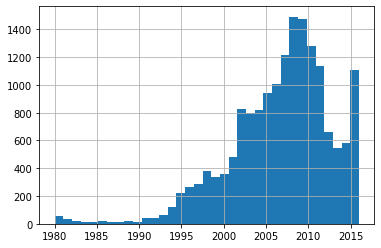

In [38]:
df['year_of_release'].hist(bins=35)

Dari histogram diatas, game banayak dirilis disekitar tahun 2008 atau 2009, sedangkan pada tahun 80an sangat sedikit game yang dirilis. Hal ini kemungkinan disebabkan oleh perkembangan teknologi yang masih sangat terbatas pada tahun 80an. 

Melihat bagaimana penjualan bervariasi dari satu platform ke platform lainnya, dan memeriksa platform dengan total penjualan terbesar.

<AxesSubplot:xlabel='platform', ylabel='Total Sales in Million USD'>

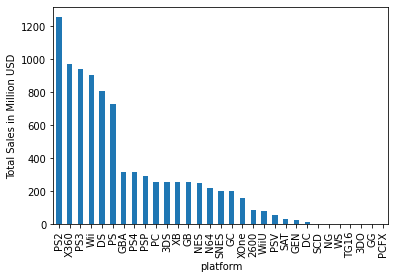

In [39]:
platform_sales = df.groupby('platform')['total_sales'].sum()
platform_sales.sort_values(ascending=False).plot(kind='bar', ylabel='Total Sales in Million USD')

Dari grafik diatas, PS2 merupakan platform dengan penjualan terbesar. Untuk melihat distribusi periodenya, data penjualan platform PS2 akan dikelompokan berdasarkan data per tahun.

<AxesSubplot:title={'center':'PS2 Sales'}, xlabel='year_of_release', ylabel='Total Sales in Million USD'>

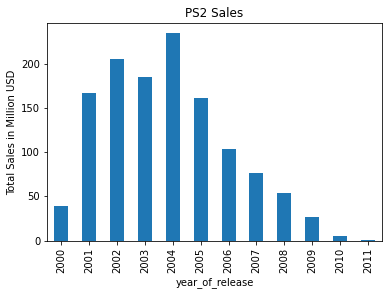

In [40]:
PS2_sales = df[df['platform'] == 'PS2'].groupby('year_of_release')['total_sales'].sum()
PS2_sales.plot(kind='bar', ylabel='Total Sales in Million USD', title='PS2 Sales')

Platform PS2 yang pertama kali dirilis ditahun 2000, mencapai puncak penjualannya ditahun 2004 dan diikuti dengan tahun 2002. Namun, dari tahun 2005 hingga 2011 total penjualannya selalu mengalami penurunan yang cukup signifikan.

Memeriksa platform yang dulunya populer tetapi sekarang tidak memiliki penjualan apa pun. 

In [41]:
df[df['total_sales'] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16653,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,75.0,7.4,Unknown,0.0
16686,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,69.0,7.4,Unknown,0.0


Terdapat dua platform yang sempat mengalami `0` penjualan, yaitu platform PS2, dan PS3. 
Memeriksa distribusi periodenya, untuk melihat total penjualan per tahun dari kedua platform.

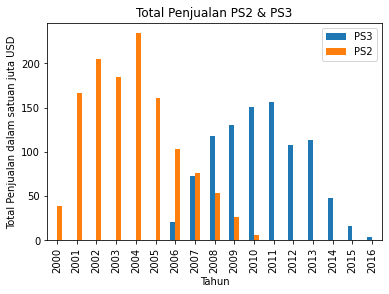

In [42]:
zero_sales = df.query("platform in ['PS2', 'PS3']").reset_index()

zero_sales_table = zero_sales.pivot_table(values='total_sales', index=['year_of_release', 'platform'], aggfunc='sum')
zero_sales_table = zero_sales_table.reindex(zero_sales['platform'].unique(), level='platform')
zero_sales_table.unstack().plot(kind='bar')


plt.xlabel('Tahun')
plt.ylabel('Total Penjualan dalam satuan juta USD')
plt.title('Total Penjualan PS2 & PS3')

plt.legend(zero_sales['platform'].unique())
plt.show()

Dari grafik diatas dapat terlihat, butuh waktu sekitar dua tahun (dari 2006 hingga 2008) untuk platform PS3 mengungguli popularitas platform PS2, yang penjualannya mulai lebih rendah dari PS3 pada tahun 2008 dan selalu mengalami penurunan pada tahun-tahun selanjutnya.

### Mempelajari dan Menangani Outlier
Menentukan periode waktu pengambilan data dengan menghapus outlier. Pada tahap sebelumnya dapat terlihat bahwa puncak penjualan terjadi pada kisaran tahun 2008, untuk itu data untuk tahun-tahun sebelumnya dapat diabaikan.

Menghapus *Outlier* dengan mengidentifikasi dan menentukan batas bawah/atas untuk rentang nilai normal pada grafik boxplot.

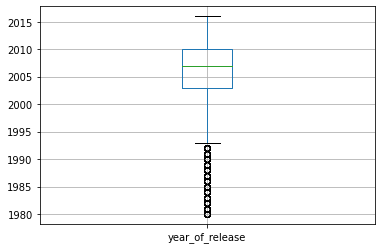

In [43]:
Q1  = df['year_of_release'].quantile(0.25)
Q3  = df['year_of_release'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1-1.5*IQR
upper_whisker = Q3+1.5*IQR

df.boxplot(['year_of_release'])
plt.show()

Lower Whisker : 1992.5
Upper Whisker : 2020.5


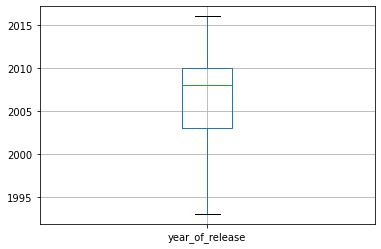

,index,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16387.00000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000,16387.000000
mean,8432.78489,2006.866907,0.249111,0.144548,0.069312,0.047607,69.702081,7.316293,0.510579
std,4798.23087,5.170903,0.712135,0.504400,0.282056,0.187862,10.067245,1.043483,1.461316
min,0.00000,1993.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,4297.50000,2003.000000,0.000000,0.000000,0.000000,0.000000,66.000000,7.200000,0.060000
50%,8469.00000,2008.000000,0.080000,0.020000,0.000000,0.010000,70.000000,7.400000,0.160000
75%,12583.50000,2010.000000,0.230000,0.110000,0.030000,0.030000,75.000000,7.800000,0.450000
max,16691.00000,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


In [44]:
df = df[(df['year_of_release'] < upper_whisker) & (df['year_of_release'] > lower_whisker)].reset_index()

print('Lower Whisker :', lower_whisker)
print('Upper Whisker :', upper_whisker)

df.boxplot(['year_of_release'])
plt.show()

df.describe()

Outlier telah dibersihkan, dengan dihapusnya data pada tahun-tahun yang tidak relevan.

### Mempelajari Data Tanpa Outlier
Memeriksa platform dengan penjualan terbanyak pada data tanpa outlier. 

<AxesSubplot:xlabel='platform', ylabel='Total Sales in Million USD'>

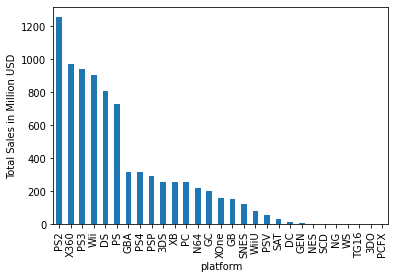

In [45]:
platform_sales = df.groupby('platform')['total_sales'].sum()
platform_sales.sort_values(ascending=False).plot(kind='bar', ylabel='Total Sales in Million USD')

Dari grafik total penjualan diatas terdapat empat platform teratas yang berpotensi menghasilkan keuntungan, yakni : 'PS2', 'PS3', 'X360', dan 'Wii'.

Memeriksa grafik penjualan dari empat platform teratas dari tahun ke tahun.

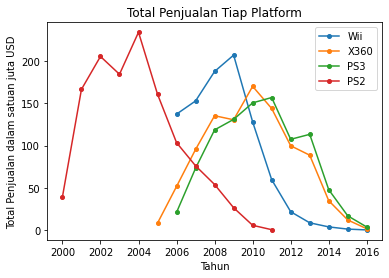

In [46]:
highest_sales = df.query("platform in ['PS2', 'PS3', 'X360', 'Wii']").reset_index()

highest_sales_table = highest_sales.pivot_table(values='total_sales', index=['year_of_release', 'platform'], aggfunc='sum')
highest_sales_table = highest_sales_table.reindex(highest_sales['platform'].unique(), level='platform')
highest_sales_table.unstack().plot(kind='line', marker='o', markersize=4)


plt.xlabel('Tahun')
plt.ylabel('Total Penjualan dalam satuan juta USD')
plt.title('Total Penjualan Tiap Platform')

plt.legend(highest_sales['platform'].unique())
plt.show()

Pada grafik diatas, platform `PS2` dan `Wii` sempat memuncaki total penjualan pada tahun yang berbeda. Sedangkan platform `PS3` dan `X360` kurang lebih memiliki tingkat total penjualan yang serupa di tiap tahunnya. Namun keempat platform diatas mulai mengalami penurunan penjualan sekitar 4 hingga 5 tahun setelah dirilis.  

Membuat boxplot untuk melihat distribusi penjualan global semua game yang dikelompokkan berdasarkan platform, serta rata-ratanya.

Wii
Rata-rata Penjualan : 0.19 juta USD


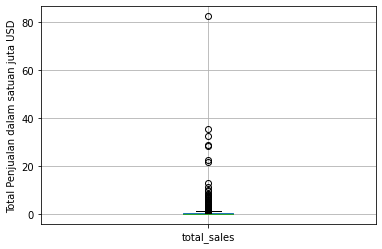

X360
Rata-rata Penjualan : 0.28 juta USD


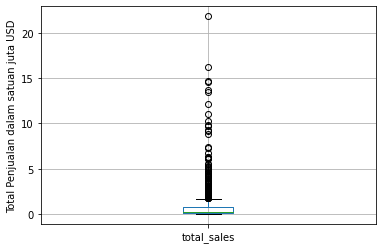

PS3
Rata-rata Penjualan : 0.27 juta USD


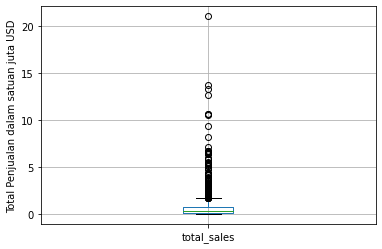

PS2
Rata-rata Penjualan : 0.23 juta USD


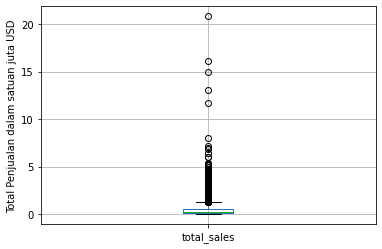

In [47]:
for platform in highest_sales['platform'].unique():
    print(platform)
    highest_sales_platform = highest_sales[highest_sales['platform'] == platform][['platform', 'total_sales']]
    print('Rata-rata Penjualan : {:.2f} juta USD'.format(highest_sales_platform['total_sales'].median()))
    highest_sales_platform.boxplot()
    plt.ylabel('Total Penjualan dalam satuan juta USD')
    
    plt.show()

Dari boxplot diatas, terlihat bahwa `Wii` memiliki rentang total penjualan terbesar yang mencapai hingga 40 juta USD, terdapat juga total penjualan diangka 80 juta USD pada platform ini, namun karena nilai yang cukup jauh dan hanya terdapat satu nilai, angka tersebut kemungkinan anomali. Sedangkan ketiga platform lainnya memiliki rentang total penjualan yang serupa mencapai kisaran 20 juta USD.

### Memeriksa Faktor yang Mempengaruhi Penjualan
Melihat bagaimana ulasan pengguna dan para profesional memengaruhi penjualan pada salah satu platform populer (platfrom `Wii` dengan rentang total penjualan terbanyak). 

Membuat scatter plot dan menghitung korelasi antara ulasan dan penjualan. 

,critic_score,total_sales,user_score
critic_score,1.000000,0.110508,0.474618
total_sales,0.110508,1.000000,0.060418
user_score,0.474618,0.060418,1.000000


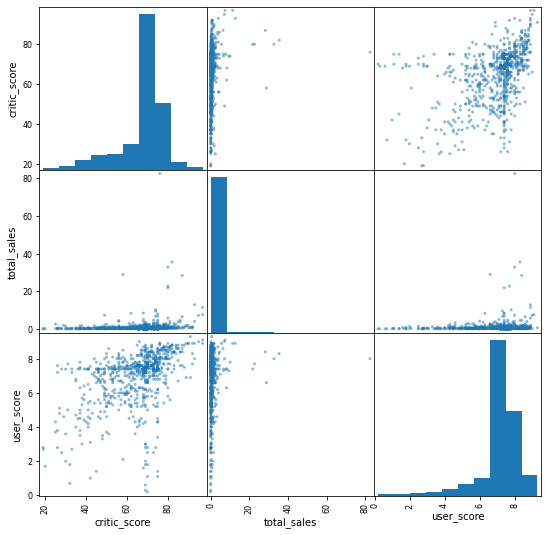

In [48]:
filtered_df = df.query('platform == "Wii"')

pivot = filtered_df.pivot_table(index='name', values=['total_sales', 'user_score','critic_score'], aggfunc='mean')
pd.plotting.scatter_matrix(pivot, figsize=(9, 9)) 
pivot.corr()

Tidak terlihat adanya korelasi antara ulasan pengguna maupun professional terhadap total penjualan. Maka dari itu, sulit menyimpulkan bahwa ulasan dapat mempengaruhi penjualan jika dilihat dari hasil perhitungan korelasi serta grafik diatas.

Mengamati distribusi penjualan umum game berdasarkan genre, untuk melihat genre yang paling menguntungkan.

<AxesSubplot:title={'center':'Total Sales in Million USD by Genre'}, ylabel='genre'>

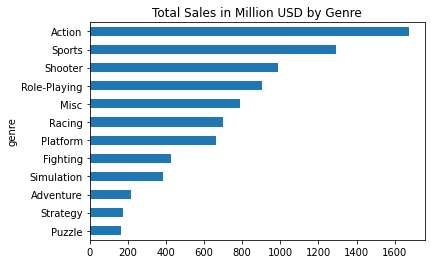

In [49]:
genre_sales = df.groupby('genre')['total_sales'].sum()
genre_sales.sort_values(ascending=True).plot(kind='barh', title='Total Sales in Million USD by Genre')

Mengingat genre Action merupakan genre dengan total penjualan tertinggi, dari hasil diatas, penjualan game dengan genre Action akan dibandingakan berdasarkan empat platform dengan penjualan teratas.

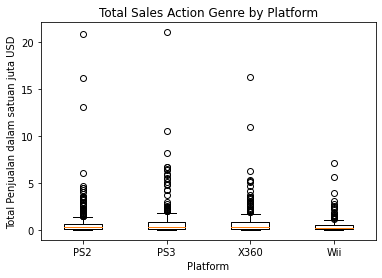

In [50]:
highest_sales_genre = df.query("genre in 'Action'").reset_index()

platforms = ['PS2', 'PS3', 'X360', 'Wii']
data = []

for platform in platforms:
    platform_sales = highest_sales_genre[highest_sales_genre['platform'] == platform]['total_sales']
    data.append(platform_sales)

plt.boxplot(data, labels=platforms)

plt.xlabel('Platform')
plt.ylabel('Total Penjualan dalam satuan juta USD')
plt.title('Total Sales Action Genre by Platform')
plt.show()

Dari perbandingan penjualan game dengan genre Action pada empat platform diatas, dapat dilihat bahwa platform `PS3` memiliki rentang penjualan tertinggi yang mencapai kisaran 7 juta USD. Sedangkan platform `Wii` yang merupakan platform dengan rentang penjualan umum tertinggi, memiliki rentang penjualan terendah pada genre Action, yaitu hanya mencapai kisaran 2 juta USD

## Pemrofilan Pengguna per Wilayah
Menentukan 5 platform teratas untuk setiap wilayah (NA, EU, JP).

na_sales


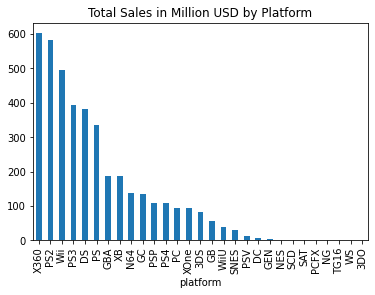

eu_sales


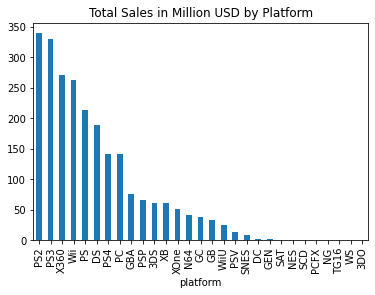

jp_sales


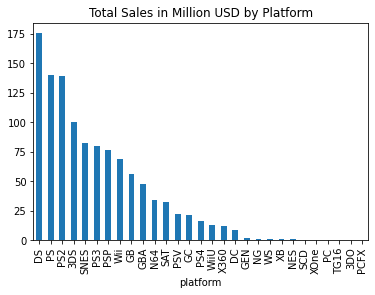

In [51]:
columns_to_check = ['na_sales', 'eu_sales', 'jp_sales']

for column in columns_to_check:
    print(column)
    regional_sales = df.groupby('platform')[column].sum()
    regional_sales.sort_values(ascending=False).plot(kind='bar', title='Total Sales in Million USD by Platform')
    plt.show()

Dari data diatas, dapat disimpulkan bahwa Amerika Utara dan Eropa memiliki variasi pangsa pasar yang serupa dimana lima platform dengan penjualan teratasnya sama, hanya terdapat masing-masing satu platform saja yang berbeda. Sedangkan di Jepang lima platform penjualan teratas cukup berbeda, dimana hanya `PS2` saja yang sama dengan wilayah lain.   

Menentukan 5 genre teratas untuk setiap wilayah (NA, EU, JP).

na_sales


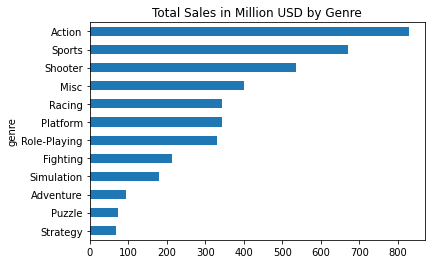

eu_sales


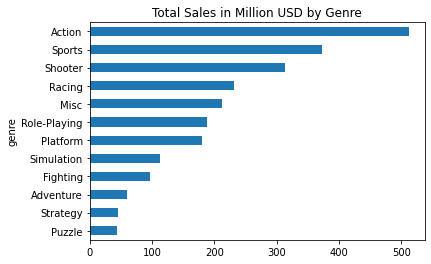

jp_sales


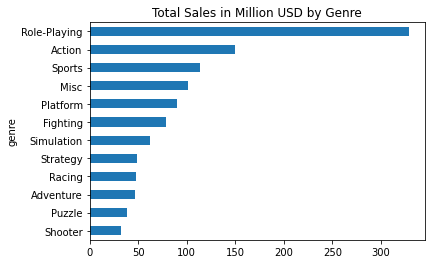

In [52]:
columns_to_check = ['na_sales', 'eu_sales', 'jp_sales']

for column in columns_to_check:
    print(column)
    regional_sales = df.groupby('genre')[column].sum()
    regional_sales.sort_values(ascending=True).plot(kind='barh', title='Total Sales in Million USD by Genre')
    plt.show()

Dari data diatas, dapat disimpulkan bahwa Amerika Utara dan Eropa memiliki variasi pangsa pasar yang serupa lagi dimana lima genre dengan penjualan teratasnya sama, hanya terdapat masing-masing satu genre saja yang berbeda. Sedangkan di Jepang lima genre game dengan penjualan teratas cukup mirip dengan dua wilayah lainnya, namun hanya urutannya yang berbeda, dimana genre Action merupakan genre dengan total penjualan pertama, tetapi di Jepang genre Action berada diposisi kedua.

Memeriksa apakah rating ESRB memengaruhi penjualan di masing-masing wilayah.

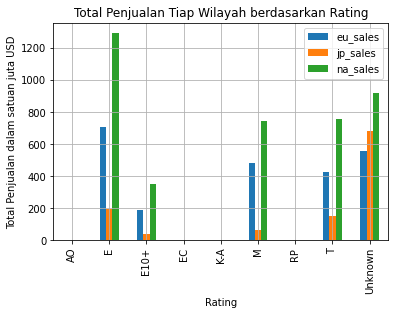

In [53]:
sales_by_rating = df.pivot_table(values=['na_sales', 'eu_sales', 'jp_sales'], index='rating', aggfunc='sum')

sales_by_rating.plot(kind='bar', grid=True)

plt.xlabel('Rating')
plt.ylabel('Total Penjualan dalam satuan juta USD')
plt.title('Total Penjualan Tiap Wilayah berdasarkan Rating')

plt.legend(sales_by_rating.columns)

plt.show()

Pada grafik diatas, walaupun masih terdapat nilai `Unknown`, rating game `E` atau `Everyone` (untuk semua umur) merupakan rating game dengan total penjualan terbanyak di masing-masing ketiga wilayah.

Dapat disimpulkan bahwa jenis game dengan tingkat penjualan yang tertinggi adalah game dengan rating `E`, serta game yang merupakan genre Action game.  

## Menguji hipotesis

Menguji hipotesis bahwa Rata-rata rating pengguna platform Xbox One dan PC adalah sama.

Hipotesis Nol (H0): Rata-rata rating pengguna platform Xbox One dan PC adalah sama.

Hipotesis Alternatif (H1): Rata-rata rating pengguna platform Xbox One dan PC adalah tidak sama.


In [54]:
xone_score = df['user_score'][df['platform'] == 'XOne'] 
pc_score = df['user_score'][df['platform'] == 'PC']

alpha = 0.05

results = st.ttest_ind(xone_score, pc_score, equal_var = True) 

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value: 2.98606894566947e-05
Kita menolak hipotesis nol


Dari hasil hipotesis diatas, dapat disimpulkan bahwa data tidak dapat membuktikan rata-rata rating pengguna platform Xbox One dan PC adalah sama.



Menguji hipotesis bahwa rata-rata rating pengguna genre Action dan Sports berbeda.

Hipotesis Nol (H0): Rata-rata rating pengguna genre Action dan Sports tidak berbeda.

Hipotesis Alternatif (H1): Rata-rata rating pengguna genre Action dan Sports berbeda.

In [55]:
action_score = df['user_score'][df['genre'] == 'Action'] 
sports_score = df['user_score'][df['genre'] == 'Sports']

alpha = 0.05

results = st.ttest_ind(action_score, sports_score, equal_var = True) 

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value: 0.5676078836552825
Kita tidak dapat menolak hipotesis nol


Dari hasil hipotesis ini, dapat disimpulkan bahwa data tidak dapat membuktikan rata-rata rating pengguna genre Action dan Sports berbeda. Terdapat 43% kemungkinan bahwa rata-rata rating pengguna genre Action dan Sports tidaklah berbeda berdasarkan data.

## Kesimpulan

Proyek ini bertujuan untuk menemukan jenis game yang paling potensial untuk merencanakan kampanye iklan ditahun depan, serta untuk menguji beberapa hipotesis.

Pada tahap awal pra-pemrosesan data ditemukan nilai yang hilang pada kolom `user_score` dan `critic_score`. Nilai yang hilang pada kedua kolom ini diisi dengan nilai median dari masing-masing kolom. Terdapat juga nilai yang hilang pada kolom `year_of_release`, `name`, dan `genre`, namun karena jumlahnya yang sangat sedikit nilai yang hilang pada tiga kolom ini dihapus. Sedangkan nilai yang hilang pada kolom `rating` diisi dengan string `Unknown` mengingat tidak ada informasi yang cukup mengenai penyebab nilai yang hilang pada kolom ini.

Selain menangani nilai yang hilang, pada tahap ini juga dilakukan penggantian nilai `tbd` pada kolom `user_score` dengan nilai mediannya. Dan juga memperbaiki tipe data kolom `year_of_release` menjadi tipe bilangan bulat. Untuk mempermudah proses analisa, ditambahkan pula kolom `total_sales` yang merupakan jumlah penjualan di semua wilayah.

Proses analisa data dimulai dengan eksplorasi data penjualan per periode untuk melihat distribusi data penjualan per tahun, setelah itu dilanjutkan dengan menghapus outlier dengan menentukan batas atas dan bawahnya. Dari data yang sudah dibersihkan, memeriksa apakah terdapat korelasi yang mempengaruhi total penjualan berdasarkan ulasannya. Namun, baik dari ulasan pengguna maupun professional tidak ditemukan adanya korelasi ulasan sebagai faktor yang mempengaruhi penjualan.

Pada tahap selanjutnya dilakukan eksplorasi data per wilayah untuk menemukan platform dan genre terpopuler dari masing-masing wilayah serta rating game mana yang paling populer. Dari hasil analisa dapat disimpulkan bahwa game bergenre Action dan memiliki rating `E` atau untuk semua umur merupakan jenis game terpopuler dan berpotensial untuk dipasarkan.

Terdapat dua hipotesis yang diuji pada proyek ini, yaitu :

— Rata-rata rating pengguna platform Xbox One dan PC adalah sama.

Dengan hasil pengujian bahwa data tidak dapat membuktikan rata-rata rating pengguna platform Xbox One dan PC adalah sama.

— Rata-rata rating pengguna genre Action dan Sports berbeda.

Dengan hasil pengujian bahwa data tidak dapat membuktikan rata-rata rating pengguna genre Action dan Sports berbeda. Terdapat 43% kemungkinan bahwa rata-rata rating pengguna genre Action dan Sports tidaklah berbeda berdasarkan data.